In [1]:
import pandas as pd
import seaborn as sns

## 1 Load data

In [2]:
# Original columns
col_instant='instant'
col_datetime='datetime'
col_season='season'
col_year='year'
col_month='month'
col_hour='hour'
col_holiday='holiday'
col_weekday='weekday'
col_workingday='workingday'
col_weather_situation='weather_situation'
col_temperature='temperature'
col_apparent_temperature='apparent_temperature'
col_humidity='humidity'
col_windspeed='windspeed'

# Target columns
col_casual='casual'
col_registered='registered'
col_cnt='cnt'

# Calculated columns
col_temperature_raw='temperature_raw'
col_temperature_raw_rounded='temperature_raw_rounded'

# Define attribute names
attribute_names_day = [col_instant, col_datetime, col_season, col_year, col_month, col_holiday, col_weekday, col_workingday, col_weather_situation,
                       col_temperature, col_apparent_temperature, col_humidity, col_windspeed, col_casual, col_registered, col_cnt]
attribute_names_hour = [col_instant, col_datetime, col_season, col_year, col_month, col_hour, col_holiday, col_weekday, col_workingday, col_weather_situation,
                       col_temperature, col_apparent_temperature, col_humidity, col_windspeed, col_casual, col_registered, col_cnt]
# Read csv files
data_bike_day = pd.read_csv("../data/bike-sharing-dataset/day.csv", skiprows=1, names=attribute_names_day)
data_bike_hour = pd.read_csv("../data/bike-sharing-dataset/hour.csv", skiprows=1, names=attribute_names_hour)

## 2 Understand data

### 2.1 Show basic facts

In [3]:
data_bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant                 731 non-null int64
datetime                731 non-null object
season                  731 non-null int64
year                    731 non-null int64
month                   731 non-null int64
holiday                 731 non-null int64
weekday                 731 non-null int64
workingday              731 non-null int64
weather_situation       731 non-null int64
temperature             731 non-null float64
apparent_temperature    731 non-null float64
humidity                731 non-null float64
windspeed               731 non-null float64
casual                  731 non-null int64
registered              731 non-null int64
cnt                     731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
data_bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant                 17379 non-null int64
datetime                17379 non-null object
season                  17379 non-null int64
year                    17379 non-null int64
month                   17379 non-null int64
hour                    17379 non-null int64
holiday                 17379 non-null int64
weekday                 17379 non-null int64
workingday              17379 non-null int64
weather_situation       17379 non-null int64
temperature             17379 non-null float64
apparent_temperature    17379 non-null float64
humidity                17379 non-null float64
windspeed               17379 non-null float64
casual                  17379 non-null int64
registered              17379 non-null int64
cnt                     17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### 2.2 Visualize raw data

In [5]:
# Extreme temperature values
temperature_min=-8
temperature_max=39
# Extreme apparent temperature values
apparent_temperature_min=-16
apparent_temperature_max=50
# Extreme humidity value
humidity_max=100
# Extreme wind speed value
windspeed_max=67

In [6]:
# Restore raw values for day data frame
data_bike_day = data_bike_day.assign(temperature_raw=data_bike_day[col_temperature] * (temperature_max-temperature_min) + temperature_min)
data_bike_day = data_bike_day.assign(apparent_temperature_raw=data_bike_day[col_apparent_temperature] * (apparent_temperature_max-apparent_temperature_min) + apparent_temperature_min)
data_bike_day = data_bike_day.assign(humidity_raw=data_bike_day[col_humidity] * humidity_max)
data_bike_day = data_bike_day.assign(windspeed_raw=data_bike_day[col_windspeed] * windspeed_max)

# Round values for better visualization
data_bike_day = data_bike_day.assign(temperature_raw_rounded=round(data_bike_day[col_temperature_raw]/5,0)*5)

# Restore raw values for hour data frame
data_bike_hour = data_bike_hour.assign(temperature_raw=data_bike_hour[col_temperature] * (temperature_max-temperature_min) + temperature_min)
data_bike_hour = data_bike_hour.assign(apparent_temperature_raw=data_bike_hour[col_apparent_temperature] * (apparent_temperature_max-apparent_temperature_min) + apparent_temperature_min)
data_bike_hour = data_bike_hour.assign(humidity_raw=data_bike_hour[col_humidity] * humidity_max)
data_bike_hour = data_bike_hour.assign(windspeed_raw=data_bike_hour[col_windspeed] * windspeed_max)

#### 2.2.1 Show data

In [7]:
# Show first few lines
data_bike_day.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weather_situation,temperature,...,humidity,windspeed,casual,registered,cnt,temperature_raw,apparent_temperature_raw,humidity_raw,windspeed_raw,temperature_raw_rounded
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,8.175849,7.999250,80.5833,10.749882,10.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,9.083466,7.346774,69.6087,16.652113,10.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,1.229108,-3.499270,43.7273,16.636703,0.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,1.400000,-1.999948,59.0435,10.739832,0.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,2.666979,-0.868180,43.6957,12.522300,5.0


In [8]:
# Show first few lines
data_bike_hour.head()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather_situation,...,apparent_temperature,humidity,windspeed,casual,registered,cnt,temperature_raw,apparent_temperature_raw,humidity_raw,windspeed_raw
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,3.28,3.0014,81.0,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,2.34,1.9982,80.0,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,2.34,1.9982,80.0,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,3.28,3.0014,75.0,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,3.28,3.0014,75.0,0.0


#### 2.2.2 Plot relation between month and number of rented bikes

* Make sure data is plausible
* Expected plot contains few peaks (most popular biking months)

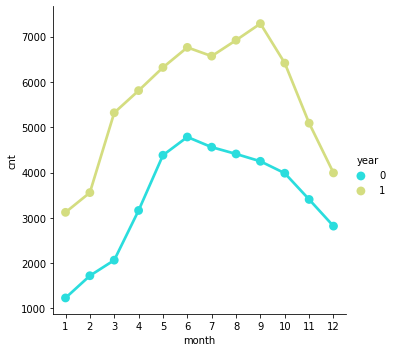

In [9]:
# Plot trend
sns.catplot(col_month,col_cnt,hue=col_year,data=data_bike_day, ci=None, kind='point', palette='rainbow')

#### 2.2.3 Plot relation between temperature and number of rented bikes

* Make sure data is plausible
* Expected plot contains one peak (optimal biking temperature)

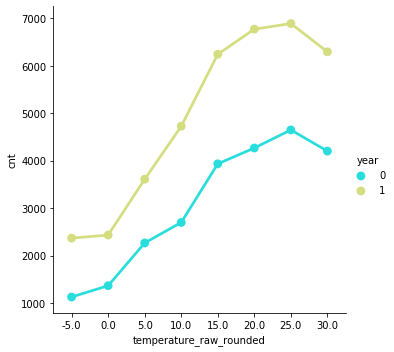

In [10]:
# Plot trend
sns.catplot(col_temperature_raw_rounded,col_cnt,hue=col_year,data=data_bike_day, ci=None, kind='point', palette='rainbow')